In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
lb = pd.read_csv(r"C:\Users\yarde\Downloads\London_Bridge.txt", delimiter=',', skipinitialspace=True)
lb.sample(5)

,Date and time,water level (m ODN),flag,HW=1 or LW=0
61791,12/02/1957 23:58:00,3.7489,1,NaN
113623,01/09/1994 09:37:00,2.3800,1,NaN
46936,10/02/1946 20:18:00,3.1113,1,NaN
29044,23/03/1933 18:42:00,-2.1541,0,NaN
110507,14/06/1992 07:28:00,-2.6000,0,NaN


skipinitialspace=True: ignore any whitespace immediately after the delimiter.

flag: 1=High water flag, 0=low water flag

In [23]:
lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115503 entries, 0 to 115502
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date and time        115503 non-null  object 
 1   water level (m ODN)  115489 non-null  float64
 2   flag                 115503 non-null  int64  
 3   HW=1 or LW=0         0 non-null       float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.5+ MB


In [24]:
#Drop columns:
#ONE WAY: lb.drop("HW=1 or LW=0", axis=1, inplace=True)
#ANOTHER WAY:
df= lb[lb.columns[:3]]

In [25]:
#change names of columns
# ONE WAY: df.rename(columns={'Date and time': 'datetime', 'water level (m ODN)': 'water_level', 'flag': 'is_high'}, inplace=True)
#NEW WAY
df.columns= ['datetime','water_level','is_high']

In [29]:
df["datetime"]= pd.to_datetime(df["datetime"], format="%d/%m/%Y %H:%M:%S")
df["water_level"]= df["water_level"].astype(float)

In [32]:
df['month']= df['datetime'].dt.month
df['year']= df['datetime'].dt.year

***Function To Clean Data For Other Files Same Way***

In [35]:
def clean_data(data):
    data= data[data.columns[:3]]
    data.columns= ['datetime','water_level','is_high']
    data['datetime']= pd.to_datetime(df["datetime"], format="%d/%m/%Y %H:%M:%S")
    data["water_level"]= data["water_level"].astype(float)
    data['month']= data['datetime'].dt.month
    data['year']= data['datetime'].dt.year

    return data

In [37]:
#check it works
data_cln = clean_data(lb)
data_cln

C:\Users\yarde\AppData\Local\Temp\ipykernel_2100\2513134497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime']= pd.to_datetime(df["datetime"], format="%d/%m/%Y %H:%M:%S")
C:\Users\yarde\AppData\Local\Temp\ipykernel_2100\2513134497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["water_level"]= data["water_level"].astype(float)


,datetime,water_level,is_high,month,year
0,1911-05-01 15:40:00,3.7130,1,5,1911
1,1911-05-02 11:25:00,-2.9415,0,5,1911
2,1911-05-02 16:05:00,3.3828,1,5,1911
3,1911-05-03 11:50:00,-2.6367,0,5,1911
4,1911-05-03 16:55:00,2.9256,1,5,1911
...,...,...,...,...,...
115498,1995-12-30 20:44:00,3.2900,1,12,1995
115499,1995-12-31 02:32:00,-1.6000,0,12,1995
115500,1995-12-31 08:59:00,3.2000,1,12,1995
115501,1995-12-31 15:03:00,-1.8000,0,12,1995


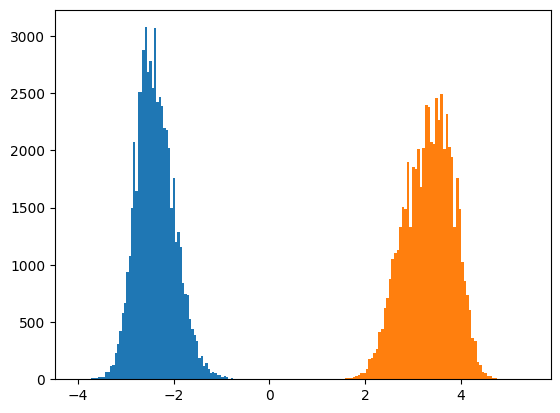

In [40]:
plt.hist(df.query('is_high == 0')['water_level'], bins=100)
plt.hist(df.query('is_high == 1')['water_level'], bins=100)
plt.show()

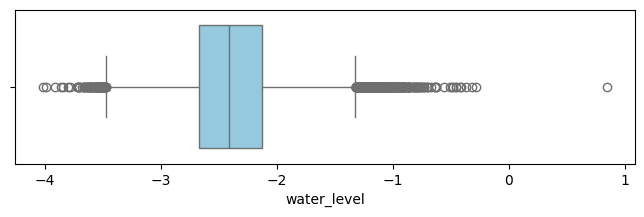

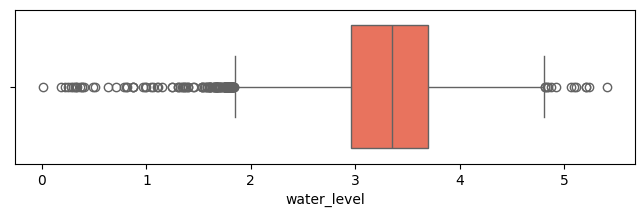

In [41]:
plt.figure(figsize=(8,2))
sns.boxplot(data=df.query('is_high == 0') ,x='water_level', color='SkyBlue')
plt.show()

plt.figure(figsize=(8,2))
sns.boxplot(data=df.query('is_high == 1') ,x='water_level', color='Tomato')
plt.show()

In [47]:
df.query('is_high == 1')['water_level'].describe()

count    57909.000000
mean         3.318373
std          0.509422
min          0.010000
25%          2.956400
50%          3.352600
75%          3.700000
max          5.409900
Name: water_level, dtype: float64

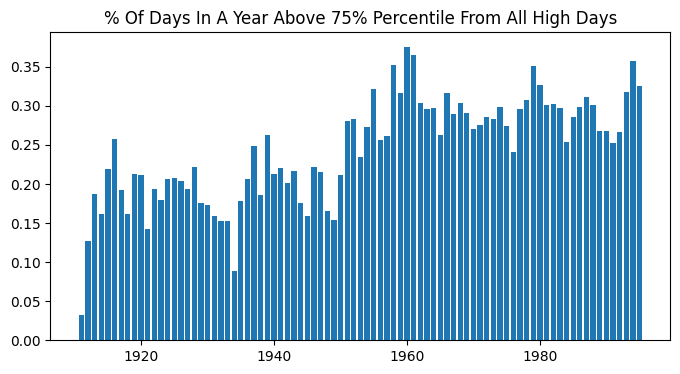

In [61]:
plt.figure(figsize=(8,4))
#number of days in a year where is_high = 1:
all_days= df.query('is_high ==1').groupby('year').count()['is_high']
# days which are above 75 percentile
high_days = df[(df['is_high'] == 1) & (df['water_level'] > 3.7)].groupby('year').count()['is_high']
ratio = (high_days / all_days).reset_index()
plt.bar(ratio.year, ratio.is_high)
plt.title('% Of Days In A Year Above 75% Percentile From All High Days')
plt.show()

In [63]:
df.query('is_high == 0')['water_level'].describe()

count    57580.000000
mean        -2.383737
std          0.399748
min         -4.013000
25%         -2.666900
50%         -2.412900
75%         -2.128700
max          0.842900
Name: water_level, dtype: float64

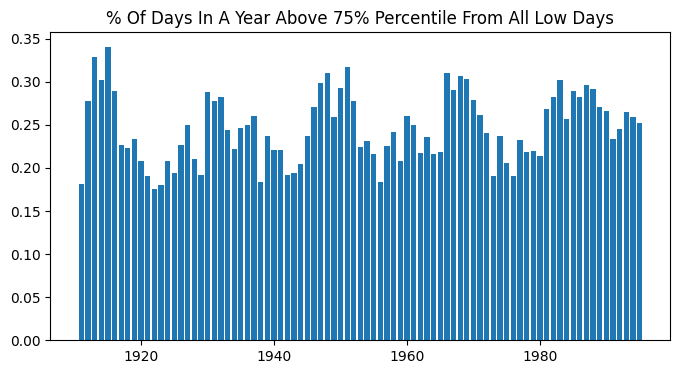

In [65]:
plt.figure(figsize=(8,4))
#number of days in a year where is_high = 1:
all_days= df.query('is_high ==0').groupby('year').count()['is_high']
# days which are above 75 percentile
high_days = df[(df['is_high'] == 0) & (df['water_level'] > -2.1287)].groupby('year').count()['is_high']
ratio = (high_days / all_days).reset_index()
plt.bar(ratio.year, ratio.is_high)
plt.title('% Of Days In A Year Above 75% Percentile From All Low Days')
plt.show()

***Monthly Trends In Water Level For 1927 - 1929***

In [72]:
#empty data frame
water_level = pd.DataFrame()

for year in range(1927,1930):
    level_per_year = df.query(f'year == {year}').set_index('datetime')
    #resample('1M').median(): takes the median for each month in that year, for each month will get the median value
    level_per_year = level_per_year.groupby('is_high').resample('1M').median()['water_level'].reset_index()
    level_per_year['month'] = level_per_year.datetime.dt.month
    level_per_year['year'] = level_per_year.datetime.dt.year
    #reset_index(drop=True): resets the index of the concatenated DataFrame while dropping the old index
    water_level = pd.concat([water_level, level_per_year]).reset_index(drop=True)
water_level

C:\Users\yarde\AppData\Local\Temp\ipykernel_2100\2532848450.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  level_per_year = level_per_year.groupby('is_high').resample('1M').median()['water_level'].reset_index()
C:\Users\yarde\AppData\Local\Temp\ipykernel_2100\2532848450.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  level_per_year = level_per_year.groupby('is_high').resample('1M').median()['water_level'].reset_index()
C:\Users\yarde\AppData\Local\Temp\ipykernel_2100\2532848450.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  level_per_year = level_per_year.groupby('is_high').resample('1M').median()['water_level'].reset_index()


,is_high,datetime,water_level,month,year
0,0,1927-01-31,-2.40810,1,1927
1,0,1927-02-28,-2.38270,2,1927
2,0,1927-03-31,-2.35730,3,1927
3,0,1927-04-30,-2.43350,4,1927
4,0,1927-05-31,-2.54780,5,1927
...,...,...,...,...,...
67,1,1929-08-31,3.15420,8,1929
68,1,1929-09-30,3.28755,9,1929
69,1,1929-10-31,3.31930,10,1929
70,1,1929-11-30,3.39550,11,1929


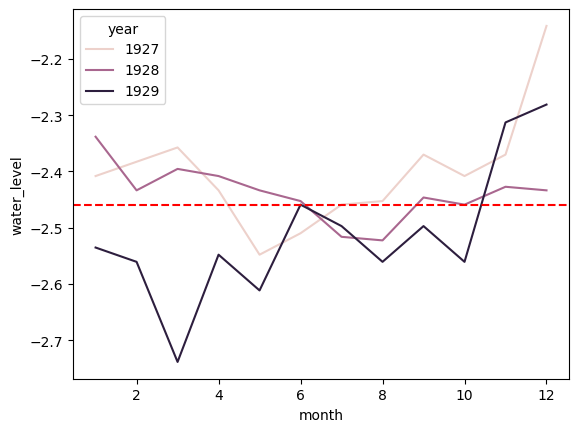

In [84]:
sns.lineplot(data=water_level[water_level['is_high']==0],
            y='water_level',
            x='month',
            hue='year')
#hotizontal line for the median
plt.axhline(-2.46,0,12,linestyle='--', color='red')
# ANOTHER WAY: 
# median = water_level[water_level['is_high'] == 0]['water_level'].median()
# plt.axhline(y=median, linestyle='--', color='red')
plt.show()